In [11]:
%pylab inline
from PIL import Image
import glob
from scipy.io import savemat, loadmat
from IPython.display import display, clear_output
import pandas as pd
import numpy as np
import random

Populating the interactive namespace from numpy and matplotlib


c:\python368-64\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Find actual cluster types and ground truth labels. E.g. Area3 has 6 different rooms as follows;

{'WC', 'conferenceRoom', 'hallway', 'lounge', 'office', 'storage'}

In [2]:
def get_room_label(path):
    if 'WC'             in path: return 0
    if 'conferenceRoom' in path: return 1
    if 'hallway'        in path: return 2
    if 'lounge'         in path: return 3
    if 'office'         in path: return 4
    if 'storage'        in path: return 5

A function to save images and its labels as numpy array to reduce cost of reading data, by converting to grayscale and resizing.

In [31]:
def save_images_and_labels():
    path = "C:\\Users\\ustundag\\GitHub\\2D-3D-Semantics\\area_3\\data\\semantic\\*.png"
    images = []
    labels = []
    paths = glob.glob(path)
    random.shuffle(paths)
    for p in paths:
        clear_output(wait=True)
        img = Image.open(p).convert('L')
        img = np.array(img.resize((90, 90), Image.NEAREST))/255
        images.append(img.flatten())
        labels.append(get_room_label(p))
        display(str(len(images)) + " / 3704")

    savemat('noXYZ_area_3_no_xyz_data_semantic_90x90.mat', {'semantic': np.array(images)})
    savemat('noXYZ_area_3_no_xyz_data_semantic_90x90_labels.mat', {'labels': np.array(labels)})

In [32]:
save_images_and_labels()

'3704 / 3704'

In [33]:
images = loadmat("C:\\Users\\ustundag\\GitHub\\2D-3D-Semantics\\noXYZ_area_3_no_xyz_data_rgb_90x90.mat")
images = images["rgb"]
labels = loadmat("C:\\Users\\ustundag\\GitHub\\2D-3D-Semantics\\noXYZ_area_3_no_xyz_data_rgb_90x90_labels.mat")
labels = labels["labels"]

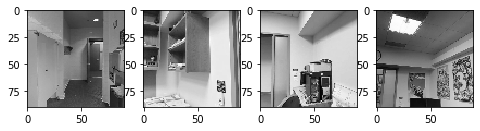

In [34]:
pylab.figure(figsize=(8, 8))
for i in range(4):
    pylab.subplot(1, 4, i + 1)
    pylab.imshow(images[i].reshape([90, 90]), cmap='gray')

In [35]:
set(labels[0])

{0, 1, 2, 3, 4, 5}